In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style as style 
style.use('fivethirtyeight')
style.use('bmh')

pd.set_option('display.max_colwidth', None)

plt.rcParams['figure.figsize'] = [10, 10]

In [176]:
#Load engagement data

eng = pd.read_csv('takehome_user_engagement.csv')
eng.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [177]:
#Load user data

users = pd.read_csv('takehome_users.csv',encoding = 'Latin1')


In [5]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
eng.shape

(207917, 3)

In [12]:
eng.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [178]:
#Convert to date time type
eng['time_stamp'] = pd.to_datetime(eng['time_stamp'])

In [179]:
eng.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [180]:
eng = eng.sort_values(by=['user_id', 'time_stamp'])

In [181]:
grouped = eng.groupby('user_id')

In [182]:
#Helper function to find adopted users

def adopted_finder(df = grouped):
    #Create list that will collect user_ids of adopted users
    adopted = []
    
    
    for user_id, group in grouped:
        group = group.reset_index(drop=True)

        
        for i in range(len(group) - 2):

            start = group.loc[i, 'time_stamp']
            end = start + (pd.Timedelta(days = 7))
                
            #Check if there are three dates within a 7 day range    
            if (group.loc[i + 1, 'time_stamp']< end) and (group.loc[i + 2, 'time_stamp'] < end):

                adopted.append(user_id)
                break
                
    return adopted            
    
            
        
        
    

In [183]:
adopted_users = adopted_finder()
len(adopted_users)

#This created list of usesr_ids of adopted users; there are 1602 in total

1602

In [184]:
total_logins = eng.groupby('user_id')['visited'].agg('sum')

In [186]:
#Create new dataframe with total number of logins for each user

total_logins = pd.DataFrame(total_logins)
total_logins

,visited
user_id,
1,1
2,14
3,1
4,1
5,1
...,...
11996,1
11997,1
11998,1


Text(0.5, 1.0, 'Histogram of total logins')

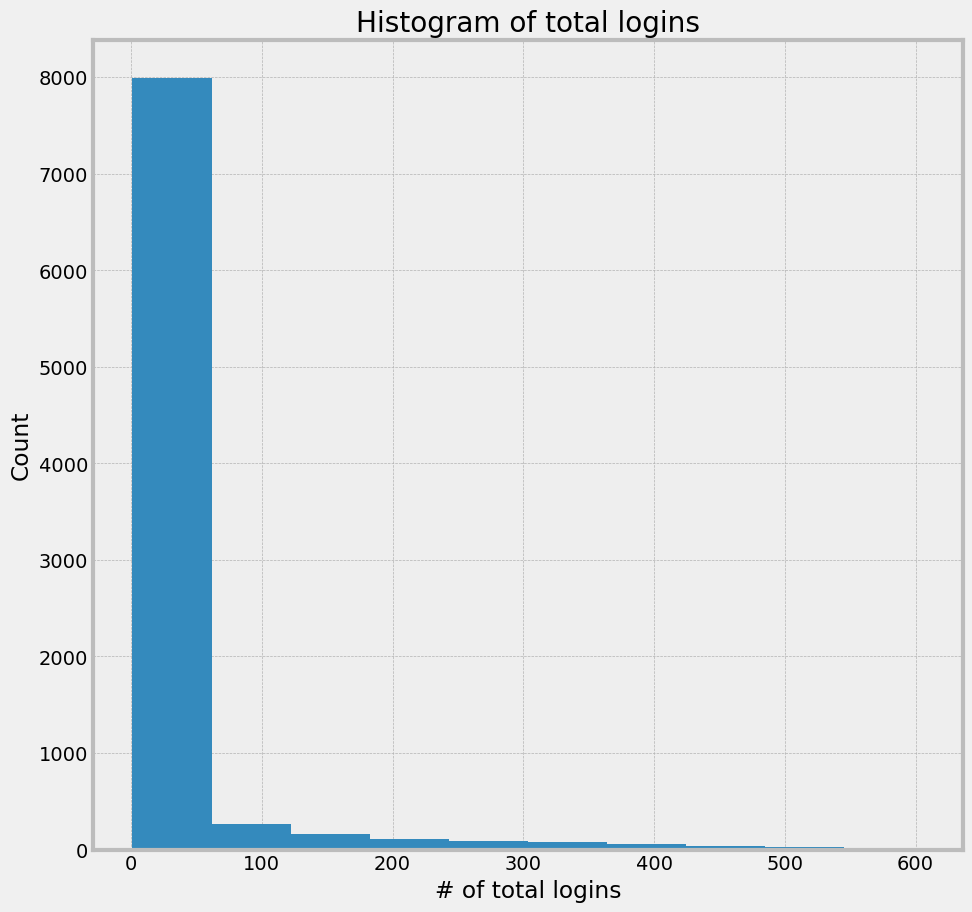

In [188]:
total_logins.hist()
plt.ylabel('Count')
plt.xlabel('# of total logins')
plt.title('Histogram of total logins')

In [130]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [191]:
def adopted_labeler(id):
    #Helper function to label as adopted or not 
    if id in adopted_users:
        return 1
    else:
        return 0


In [192]:
#Create new column for target variable - adopted 
users['adopted'] = users['object_id'].apply(adopted_labeler)

In [193]:
users['adopted'].value_counts()

0    10398
1     1602
Name: adopted, dtype: int64

In [194]:
users = pd.merge(users,total_logins,how = 'left',left_on = 'object_id',right_on = 'user_id')

In [195]:
users.rename(columns = {'visited':'total_logins'},inplace = True)
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,total_logins
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0,1.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0,1.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0,1.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0,1.0


In [151]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000,12000.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145,0.133500
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968,0.340128
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000,0.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000,0.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000,0.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000,0.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,1.000000


In [152]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted                          0
dtype: int64

Many null values for 'invited_by_user_id' and hard to use this data for anything predictive so will drop it

In [143]:
ad_users.duplicated().value_counts()

False    1602
dtype: int64

In [168]:
corr_matrix = users.corr(numeric_only = True)

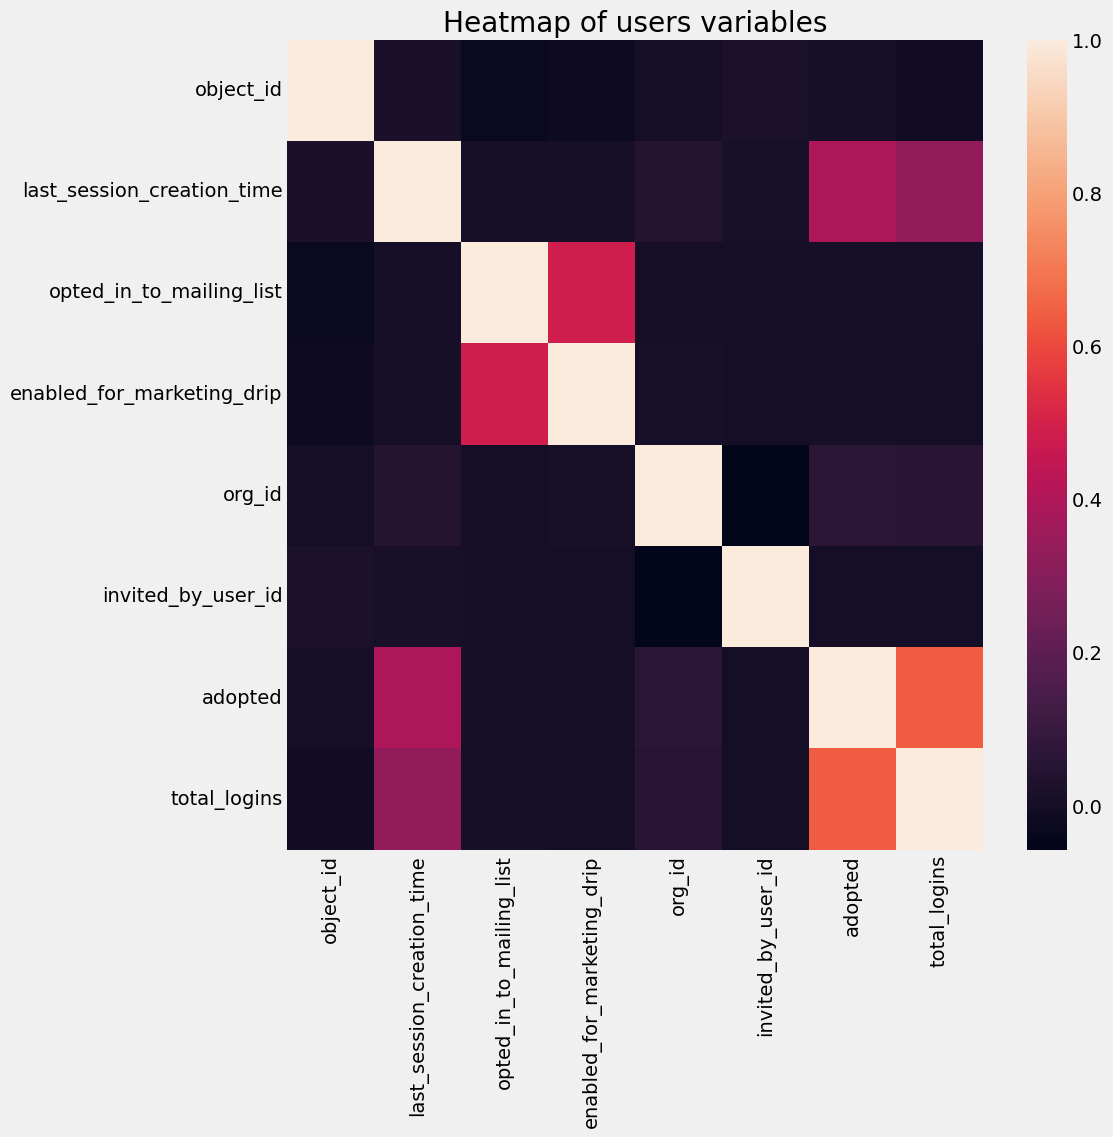

In [189]:
#Create heatmap to see correlation between numeric features and adoption rate

sns.heatmap(data=corr_matrix)
plt.title('Heatmap of users variables')
plt.show()

Heatmap shows last session creation time and total logins as having correlation with adodption rate. Focusing on number of logins appears to be a strong indicator of adoption. 

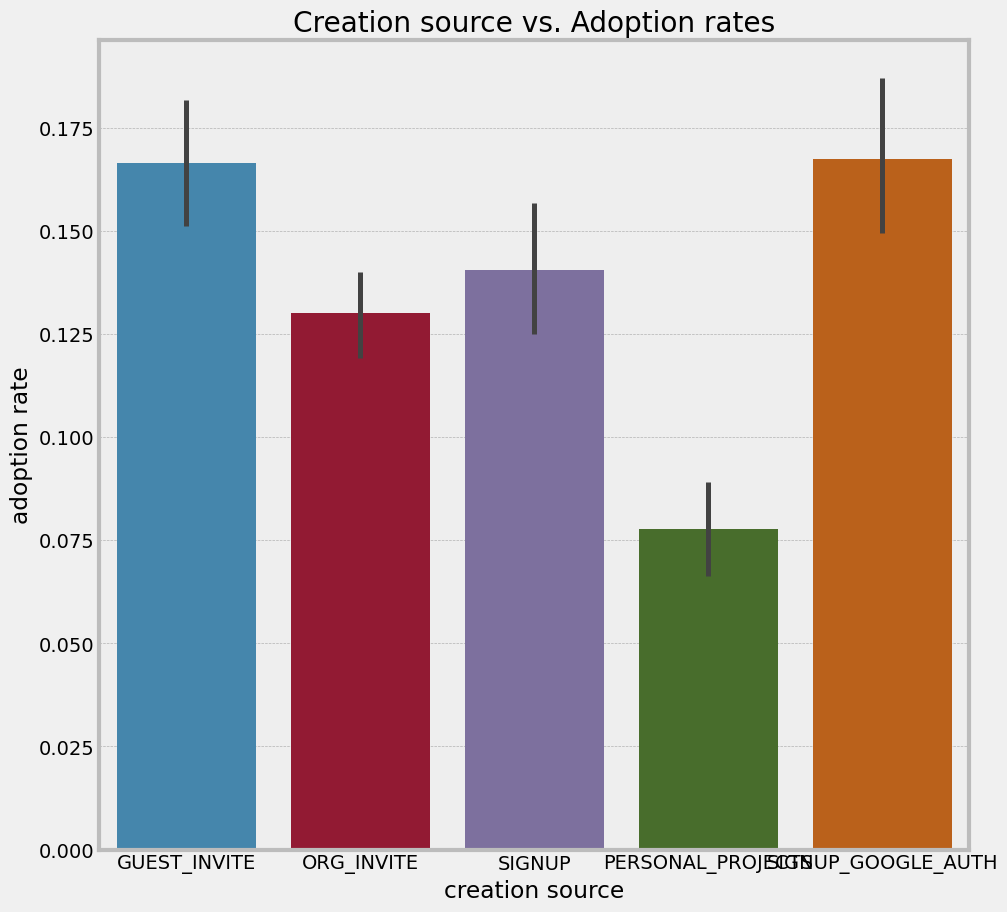

In [175]:
#Create barplot grouping by creation source and looking at adoption

_ = sns.barplot(x =users.creation_source, y = users.adopted)
plt.title('Creation source vs. Adoption rates')
plt.xlabel('creation source')
plt.ylabel('adoption rate')
plt.show()

Graph shows creation source as personal projects seem to have significantly lower adoption rate. 

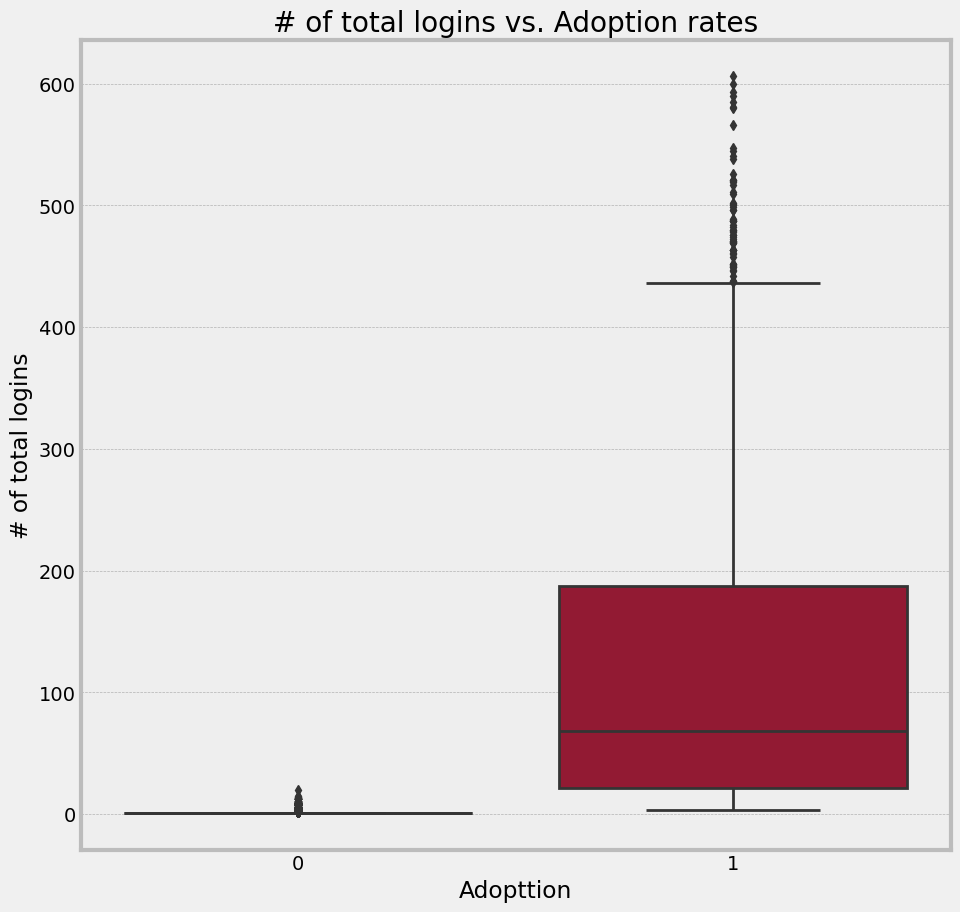

In [207]:
#Create boxplot grouping by # of total logins and looking at adoption

_ = sns.boxplot(y ='total_logins', x = 'adopted', data = users)
plt.title('# of total logins vs. Adoption rates')
plt.xlabel('Adopttion')
plt.ylabel('# of total logins')
plt.show()

Large varriance between adopted and not adopted in total log ins. However, definition of 'adopted' is derived from log-ins so might be circular in logic and not very insightful. 

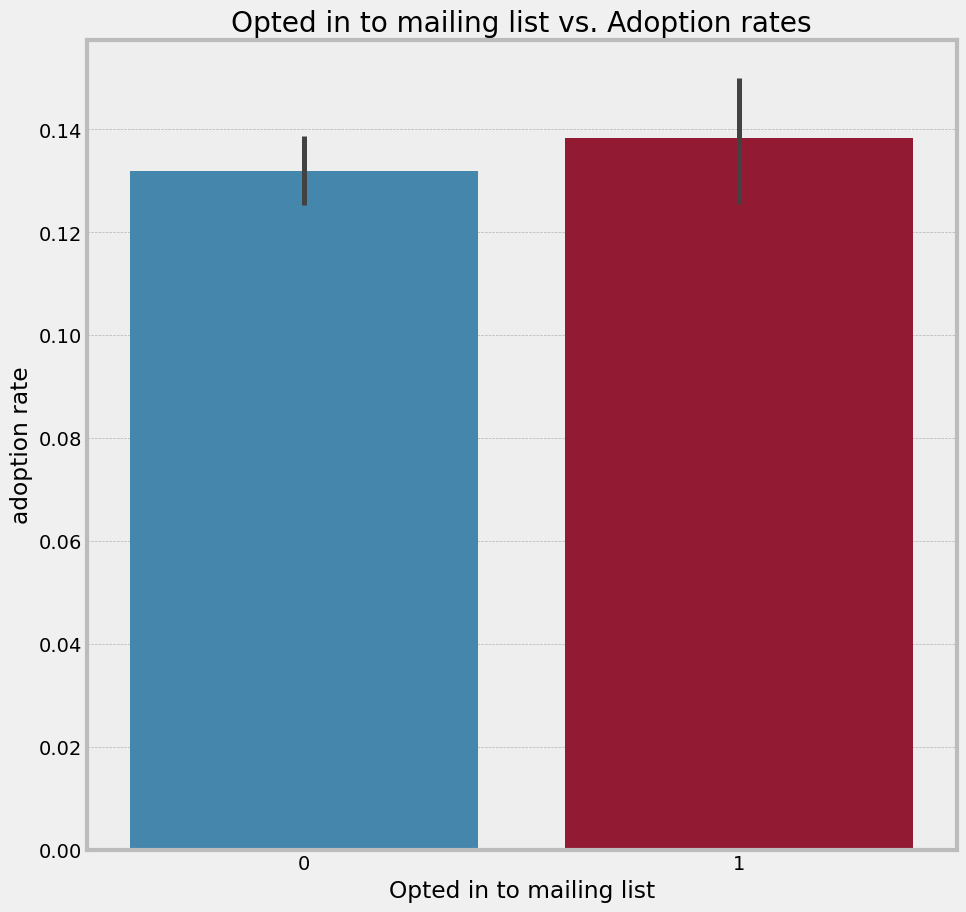

In [206]:
#Create barplot grouping by those opted in to mailing list and looking at adoption

_ = sns.barplot(x =users.opted_in_to_mailing_list, y = users.adopted)
plt.title('Opted in to mailing list vs. Adoption rates')
plt.xlabel('Opted in to mailing list')
plt.ylabel('adoption rate')
plt.show()

Not noticeable difference in adoption between those that opted in to mailing list vs not. 

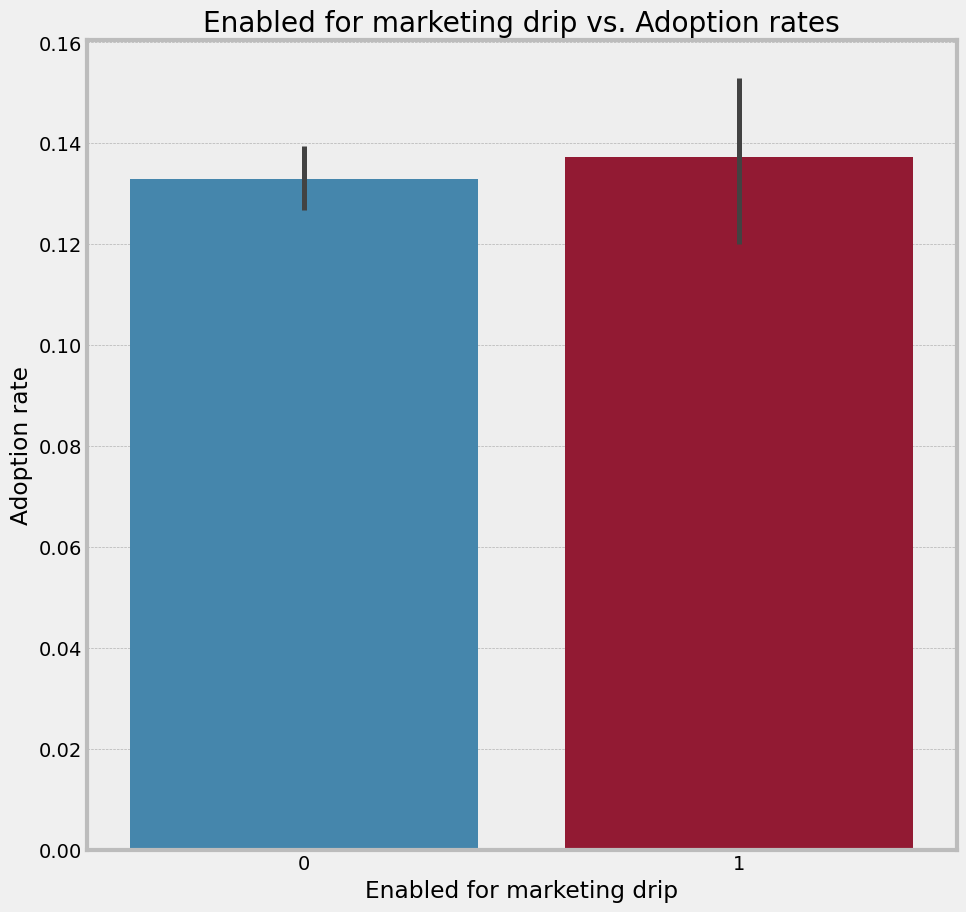

In [210]:
#Create barplot grouping by those opted in to mailing list and looking at adoption

_ = sns.barplot(x =users.enabled_for_marketing_drip, y = users.adopted)
plt.title('Enabled for marketing drip vs. Adoption rates')
plt.xlabel('Enabled for marketing drip')
plt.ylabel('Adoption rate')
plt.show()

There is no signficant difference in adoption between those enabled for marketing drip or not. 

**In summary, the marketing list and marketing drip do not appear to be strong indicators of adopted users. # of logins is a strong indicator however, it is closely tied to the definition of an adopted user. There are some notable differences in creation source that the company can look closer into.** 